DS Question Text Analysis

by Zehra Erden - 1001891949

Dr. Angela J Liegey-Dougall

## Uploading Data

In [1]:
#adding library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import heapq
import lda

/home/erdenzehra/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading the dataset
df = pd.read_excel("ds_question_data.xlsx")
df

,No.,Response ID,DS_Question,DS_sentiment,DS_sentiment_no,DS_Pos_Neg,DS_Pos_Neg_no
0,1,115957423.0,I think data science is very harmful for the p...,Very Negative,1,No,0
1,2,115967923.0,Data science is an important field that is gro...,Positive,4,No,0
2,3,115970627.0,"honestly, i have no clue what data science is....",Positive,4,No,0
3,4,115975222.0,I think its a massive research that involves t...,Neutral,3,No,0
4,5,115975539.0,It means a research or study done using data c...,Neutral,3,No,0
...,...,...,...,...,...,...,...
250,251,118582232.0,The term used for the use of data and statistics,Neutral,3,No,0
251,252,118582973.0,collective data used to benefit society or a s...,Positive,4,No,0
252,253,118589695.0,Numbers and scientific reasonings,Neutral,3,No,0
253,254,118592115.0,not sure what it is,Neutral,3,No,0


## Text Preprocessing

In [3]:
#dropping unnecessary columns
df = df.drop('No.', axis = 1) #we have index values to use
df = df.drop('Response ID', axis = 1) #we will not working with student ids, data privacy
df = df.drop('DS_Pos_Neg', axis = 1) ##already have the encoded column "DS_Pos_Neg_no"
#we will need the DS_sentiment for plotting

In [4]:
#changing the column names
cols = ['Response', 'Sentiment (Manual)', 'Manual Sentiment Score', 'Both Sentiment Exist (Manual)']
df.columns = cols

In [5]:
df

,Response,Sentiment (Manual),Manual Sentiment Score,Both Sentiment Exist (Manual)
0,I think data science is very harmful for the p...,Very Negative,1,0
1,Data science is an important field that is gro...,Positive,4,0
2,"honestly, i have no clue what data science is....",Positive,4,0
3,I think its a massive research that involves t...,Neutral,3,0
4,It means a research or study done using data c...,Neutral,3,0
...,...,...,...,...
250,The term used for the use of data and statistics,Neutral,3,0
251,collective data used to benefit society or a s...,Positive,4,0
252,Numbers and scientific reasonings,Neutral,3,0
253,not sure what it is,Neutral,3,0


In [6]:
#data types of each feature
df.dtypes

Response                         object
Sentiment (Manual)               object
Manual Sentiment Score            int64
Both Sentiment Exist (Manual)     int64
dtype: object

In [7]:
#printing the number of unique values in each column
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")

Number of unique values in 'Response': 255
Number of unique values in 'Sentiment (Manual)': 5
Number of unique values in 'Manual Sentiment Score': 5
Number of unique values in 'Both Sentiment Exist (Manual)': 2


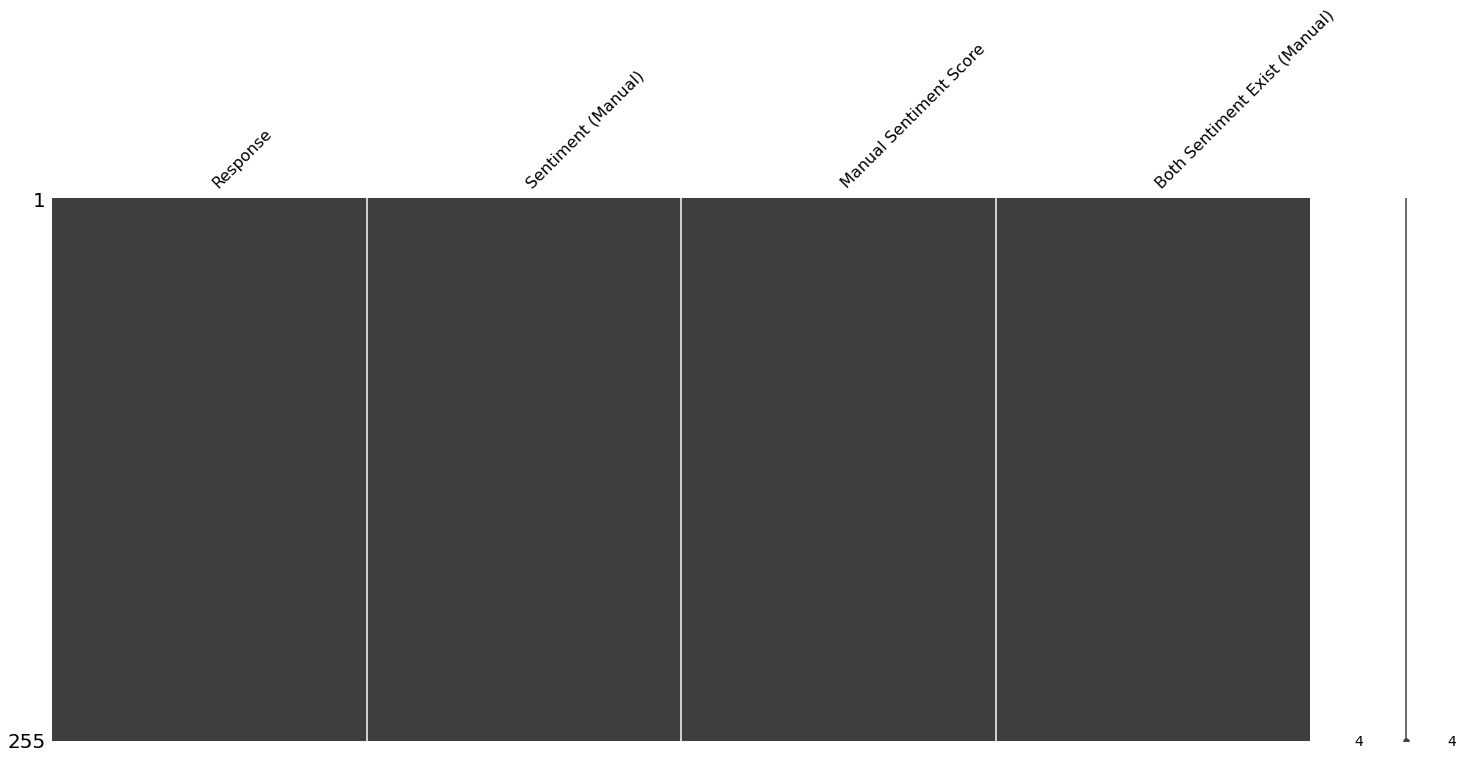

In [8]:
#missing value check
missing_values = df.isnull().sum()
ms.matrix(df)
plt.show()

In [9]:
#checking duplicated records
duplicates = df.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

Number of Duplicated Entries:  0


## Exploratory Data Analysis

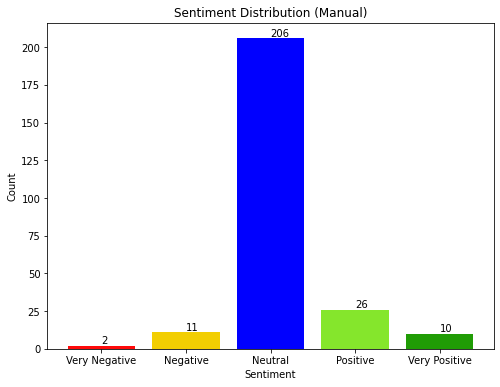

In [10]:
#counting each sentiment category in the df
sentiment_counts = df['Sentiment (Manual)'].value_counts()

#defining the color palette
colors = {
    'Very Negative': '#ff0a0a',
    'Negative': '#f2ce02',
    'Neutral': 'blue',
    'Positive': '#85e62c',
    'Very Positive': '#209c05'
}

# sorting the sentiment counts
sorted_sentiment_counts = sentiment_counts.reindex(colors.keys())

# plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_sentiment_counts.index, sorted_sentiment_counts, color=[colors[sentiment] for sentiment in sorted_sentiment_counts.index])
plt.title('Sentiment Distribution (Manual)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

#adding count labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')
plt.show()

In [11]:
print("Mean Sentiment Score (Manual): ", df['Manual Sentiment Score'].mean())

Mean Sentiment Score (Manual):  3.1215686274509804


In [12]:
print("Most Frequent Sentiment Category (Manual): ", df['Sentiment (Manual)'].mode()[0])

Most Frequent Sentiment Category (Manual):  Neutral


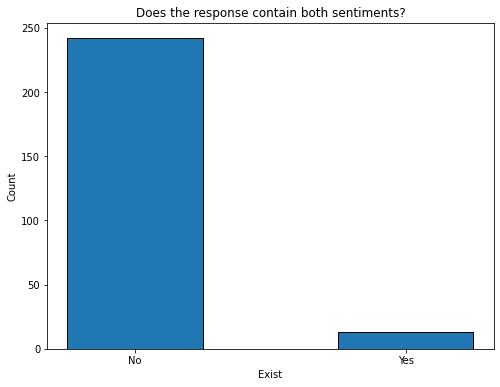

In [13]:
#labeling both sentiment data points
data_labels = ['No', 'Yes']

#plotting
plt.figure(figsize=(8, 6))
plt.hist(df['Both Sentiment Exist (Manual)'], bins=2, edgecolor='black', align='mid', rwidth=0.5)

plt.xlabel('Exist')
plt.ylabel('Count')
plt.title('Does the response contain both sentiments?')
plt.xticks([0.25, 0.75], data_labels)  

plt.show()

## Text Preprocessing

In [14]:
#defining a function to preprocess the text data
def preprocess_text(text, additional_stopwords=None):
    text = text.lower() #converting the input text to lowercase

    tokens = nltk.word_tokenize(text) #splitting the lowercase text into tokens (individual words)

    stop_words = set(stopwords.words('english')) #creating a set of english stopwords
    if additional_stopwords: #cheking if there is any laterly added stopwords
        stop_words.update(additional_stopwords)
    tokens = [word for word in tokens if word.lower() not in stop_words] #removing stopwords from the list of tokens

    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in tokens if word] #removing non-alphanumeric characters from each token

    lemmatizer = WordNetLemmatizer() #initializing a WordNet lemmatizer object to reduce words to their root form
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #lemmatizing each word in the list of tokens

    return ' '.join(tokens)

In [15]:
#assigning additional words. these words happen to occur very frequently when they do not mean a lot for our analysis
additional_stopwords = ['include', 'involve', 'involves', 'data', 'science', 'think', 'thing', 'know', 'nt', 'may', 'way', 'like', 'something', 'come', 'using', 'lot', 'really']

#applying the funtion to the text data column
df['Response'] = df['Response'].apply(lambda x: preprocess_text(x, additional_stopwords))

## Word Frequency Analysis

In [16]:
#counting word frequencies
word_counts = Counter()
responses = df['Response']
for response in responses:
    words = response.split()
    word_counts.update(words)

#getting the most common 10 words
most_common_words = word_counts.most_common(10)
print("Most common 10 words:", most_common_words)

Most common 10 words: [('information', 46), ('people', 39), ('statistic', 38), ('mean', 33), ('number', 31), ('study', 27), ('computer', 24), ('research', 23), ('experiment', 23), ('field', 22)]


In [17]:
#top 20
word_counts.most_common(20)

[('information', 46),
 ('people', 39),
 ('statistic', 38),
 ('mean', 33),
 ('number', 31),
 ('study', 27),
 ('computer', 24),
 ('research', 23),
 ('experiment', 23),
 ('field', 22),
 ('important', 21),
 ('nt', 21),
 ('topic', 20),
 ('collecting', 18),
 ('math', 17),
 ('thing', 16),
 ('used', 15),
 ('make', 15),
 ('come', 15),
 ('first', 15)]

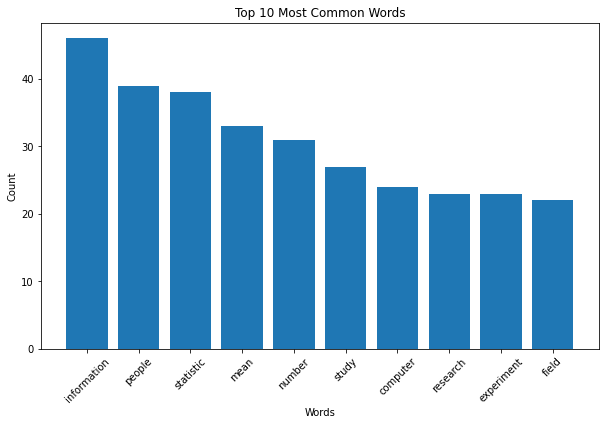

In [18]:
#visualizing the top 10 word counts using bar graph
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

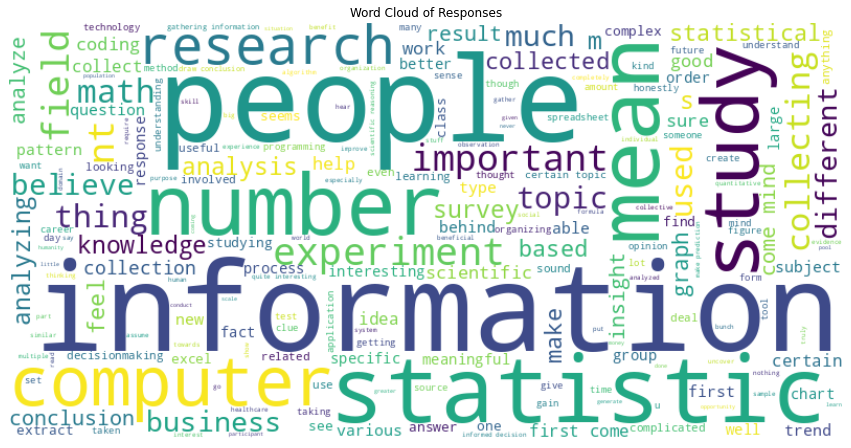

In [19]:
#combining all responses into a single string
all_responses = ' '.join(df['Response'])

#avoiding most common words appearing multiple times
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(most_common_words)
#generating a word cloud for all words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

#plotting


plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Responses')
plt.show()

## Vectorization

In [20]:
#adding library
from sklearn.decomposition import LatentDirichletAllocation
import lda
import heapq
import gensim
from gensim.models import LdaModel

In [21]:
word2count = {}
responses = df['Response']
for response in responses:
    words = nltk.word_tokenize(response)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [22]:
word2count

{'harmful': 1,
 'population': 2,
 'big': 3,
 'business': 13,
 'best': 1,
 'intention': 1,
 'willing': 1,
 'harm': 1,
 'humanity': 2,
 'sake': 1,
 'money': 2,
 'power': 1,
 'important': 21,
 'field': 22,
 'growing': 1,
 'fast': 1,
 'rate': 1,
 'continue': 2,
 'grow': 2,
 'honestly': 4,
 'clue': 4,
 've': 1,
 'taken': 4,
 'statistic': 38,
 'class': 5,
 'still': 1,
 'conduct': 2,
 'however': 6,
 'thing': 16,
 'massive': 1,
 'research': 23,
 'answer': 5,
 'selected': 1,
 'group': 6,
 'people': 39,
 'different': 13,
 'situation': 2,
 'selectively': 1,
 'see': 5,
 'average': 1,
 'result': 10,
 'mean': 33,
 'study': 27,
 'done': 2,
 'collected': 12,
 'pool': 2,
 'participant': 2,
 'computer': 24,
 'software': 1,
 'well': 6,
 'information': 46,
 'generated': 1,
 'experiment': 23,
 'along': 1,
 'collection': 9,
 'also': 10,
 'show': 3,
 'certain': 13,
 'algorithm': 3,
 'math': 17,
 'graph': 11,
 'classify': 1,
 'grasp': 1,
 'number': 31,
 'analytics': 1,
 'type': 7,
 'scientific': 12,
 'process

In [23]:
# Select the top words based on their count
words = heapq.nlargest(1000, word2count, key=word2count.get)

In [24]:
#bag of words
X = []
for response in responses:
    vector = []
    for word in words:
        if word in nltk.word_tokenize(response):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

## Topic Modeling - Latent Dirichlet Allocation

In [25]:
lda_model = lda.LDA(n_topics=3, random_state=42, n_iter=1000)
lda_model.fit(X)

INFO:lda:n_documents: 255
INFO:lda:vocab_size: 723
INFO:lda:n_words: 1999
INFO:lda:n_topics: 3
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -18524
INFO:lda:<10> log likelihood: -15223
INFO:lda:<20> log likelihood: -15055
INFO:lda:<30> log likelihood: -14926
INFO:lda:<40> log likelihood: -14877
INFO:lda:<50> log likelihood: -14806
INFO:lda:<60> log likelihood: -14829
INFO:lda:<70> log likelihood: -14894
INFO:lda:<80> log likelihood: -14838
INFO:lda:<90> log likelihood: -14846
INFO:lda:<100> log likelihood: -14836
INFO:lda:<110> log likelihood: -14840
INFO:lda:<120> log likelihood: -14835
INFO:lda:<130> log likelihood: -14839
INFO:lda:<140> log likelihood: -14818
INFO:lda:<150> log likelihood: -14768
INFO:lda:<160> log likelihood: -14830
INFO:lda:<170> log likelihood: -14823
INFO:lda:<180> log likelihood: -14794
INFO:lda:<190> log likelihood: -14781
INFO:lda:<200> log likelihood: -14780
INFO:lda:<210> log likelihood: -14798
INFO:lda:<220> log likelihood: -14797
INFO:lda:<230> log l

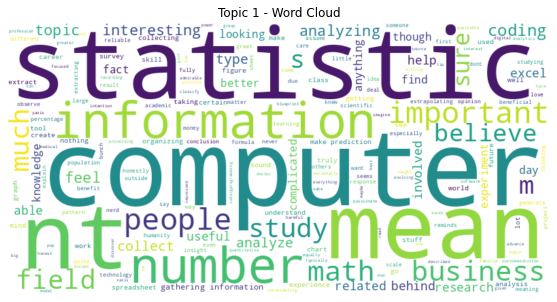

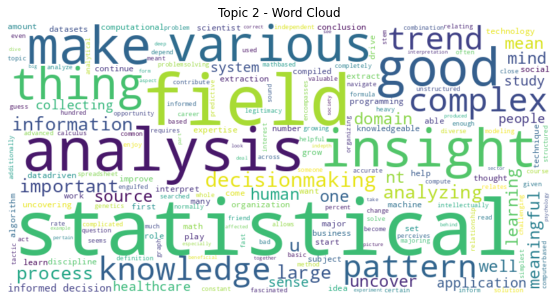

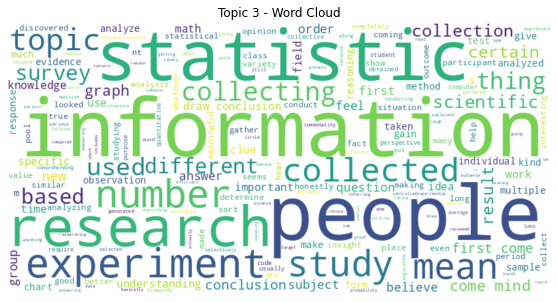

In [26]:
topic_word = lda_model.topic_word_
max_words_per_topic = 50 

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(words)[np.argsort(topic_dist)][::-1]
    
    topic_words = topic_words[:max_words_per_topic]
    
    topic_text = ''
    
    for doc_idx in range(len(responses)): 
        
        if lda_model.doc_topic_[doc_idx].argmax() == i:
           
            topic_text += ' '.join(nltk.word_tokenize(responses[doc_idx])) + ' '
    
    if topic_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_text)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {i+1} - Word Cloud')
        plt.axis('off')
        plt.show()
    else:
        print(f"No words associated with Topic {i+1}. Skipping word cloud generation.")

In [27]:
topic_predictions = lda_model.transform(X)
topic_predictions

array([[7.49181645e-01, 2.50701663e-01, 1.16692873e-04],
       [4.03171553e-03, 9.95913590e-01, 5.46948196e-05],
       [5.05084941e-01, 5.31985403e-03, 4.89595205e-01],
       [8.40281700e-02, 2.00560140e-04, 9.15771270e-01],
       [6.61312360e-03, 7.52487298e-05, 9.93311628e-01],
       [7.47601763e-01, 2.43292786e-01, 9.10545103e-03],
       [1.10595036e-01, 1.83586436e-01, 7.05818528e-01],
       [5.79404112e-01, 2.28365761e-04, 4.20367523e-01],
       [5.19084286e-01, 2.94785284e-04, 4.80620929e-01],
       [8.39028798e-01, 3.04690338e-04, 1.60666512e-01],
       [6.83581485e-01, 1.56572284e-03, 3.14852793e-01],
       [9.77993129e-01, 2.05559355e-04, 2.18013112e-02],
       [4.50841902e-05, 9.98705727e-01, 1.24918918e-03],
       [9.91537815e-01, 1.28006006e-04, 8.33417864e-03],
       [9.46781311e-04, 1.50016586e-03, 9.97553053e-01],
       [2.59448084e-01, 7.40481602e-01, 7.03141174e-05],
       [8.04167067e-01, 1.94164061e-01, 1.66887231e-03],
       [5.69478047e-01, 3.32248

In [28]:
dominant_topics = np.argmax(topic_predictions, axis=1)
dominant_topics

array([0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1,
       0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1])

In [29]:
topic_df = pd.DataFrame(topic_predictions, columns=[f"Topic_{i+1}" for i in range(topic_predictions.shape[1])])
topic_df

,Topic_1,Topic_2,Topic_3
0,0.749182,0.250702,0.000117
1,0.004032,0.995914,0.000055
2,0.505085,0.005320,0.489595
3,0.084028,0.000201,0.915771
4,0.006613,0.000075,0.993312
...,...,...,...
250,0.010603,0.000195,0.989203
251,0.167898,0.134061,0.698040
252,0.018429,0.000141,0.981430
253,0.997275,0.001754,0.000971


In [30]:
topic_df['Dominant_Topic'] = dominant_topics
topic_df

,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,0.749182,0.250702,0.000117,0
1,0.004032,0.995914,0.000055,1
2,0.505085,0.005320,0.489595,0
3,0.084028,0.000201,0.915771,2
4,0.006613,0.000075,0.993312,2
...,...,...,...,...
250,0.010603,0.000195,0.989203,2
251,0.167898,0.134061,0.698040,2
252,0.018429,0.000141,0.981430,2
253,0.997275,0.001754,0.000971,0


## Visualization

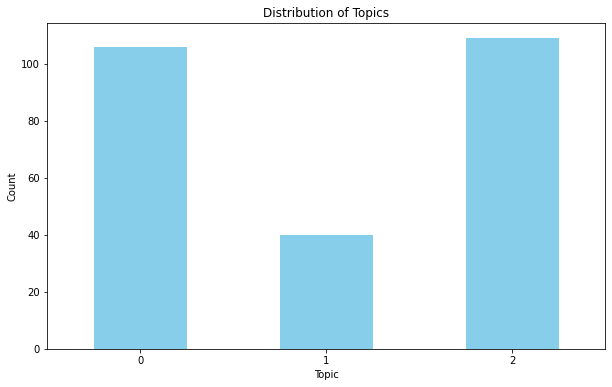

In [31]:
plt.figure(figsize=(10, 6))
topic_counts = topic_df['Dominant_Topic'].value_counts().sort_index()
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Sentiment Analysis

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [33]:
def get_sentiment_scores(text):
    sentiment_score = sid.polarity_scores(text)
    
    positive_score = sentiment_score['pos']
    negative_score = sentiment_score['neg']
    neutral_score = sentiment_score['neu']
    compound_score = sentiment_score['compound']
    
    return {
        'Positive': positive_score,
        'Negative': negative_score,
        'Neutral': neutral_score,
        'Compound': compound_score
    }

In [34]:
df['Sentiment_Scores'] = df['Response'].apply(get_sentiment_scores)
df

,Response,Sentiment (Manual),Manual Sentiment Score,Both Sentiment Exist (Manual),Sentiment_Scores
0,harmful population big business best intention...,Very Negative,1,0,"{'Positive': 0.237, 'Negative': 0.198, 'Neutra..."
1,important field growing fast rate continue grow,Positive,4,0,"{'Positive': 0.412, 'Negative': 0.0, 'Neutral'..."
2,honestly clue ve taken statistic class still...,Positive,4,0,"{'Positive': 0.324, 'Negative': 0.0, 'Neutral'..."
3,massive research answer selected group people ...,Neutral,3,0,"{'Positive': 0.0, 'Negative': 0.0, 'Neutral': ..."
4,mean research study done collected pool partic...,Neutral,3,0,"{'Positive': 0.0, 'Negative': 0.0, 'Neutral': ..."
...,...,...,...,...,...
250,term used use statistic,Neutral,3,0,"{'Positive': 0.0, 'Negative': 0.0, 'Neutral': ..."
251,collective used benefit society small sample p...,Positive,4,0,"{'Positive': 0.333, 'Negative': 0.0, 'Neutral'..."
252,number scientific reasoning,Neutral,3,0,"{'Positive': 0.394, 'Negative': 0.0, 'Neutral'..."
253,sure,Neutral,3,0,"{'Positive': 1.0, 'Negative': 0.0, 'Neutral': ..."


In [35]:
sentiment_scores_df = df['Sentiment_Scores'].apply(pd.Series)
df = pd.concat([df, sentiment_scores_df], axis=1)
df = df.drop(columns=['Sentiment_Scores'])
df

,Response,Sentiment (Manual),Manual Sentiment Score,Both Sentiment Exist (Manual),Positive,Negative,Neutral,Compound
0,harmful population big business best intention...,Very Negative,1,0,0.237,0.198,0.565,0.1779
1,important field growing fast rate continue grow,Positive,4,0,0.412,0.000,0.588,0.3612
2,honestly clue ve taken statistic class still...,Positive,4,0,0.324,0.000,0.676,0.5859
3,massive research answer selected group people ...,Neutral,3,0,0.000,0.000,1.000,0.0000
4,mean research study done collected pool partic...,Neutral,3,0,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...
250,term used use statistic,Neutral,3,0,0.000,0.000,1.000,0.0000
251,collective used benefit society small sample p...,Positive,4,0,0.333,0.000,0.667,0.4588
252,number scientific reasoning,Neutral,3,0,0.394,0.000,0.606,0.0772
253,sure,Neutral,3,0,1.000,0.000,0.000,0.3182


In [36]:
df['Dominant_Topic'] = dominant_topics
df

,Response,Sentiment (Manual),Manual Sentiment Score,Both Sentiment Exist (Manual),Positive,Negative,Neutral,Compound,Dominant_Topic
0,harmful population big business best intention...,Very Negative,1,0,0.237,0.198,0.565,0.1779,0
1,important field growing fast rate continue grow,Positive,4,0,0.412,0.000,0.588,0.3612,1
2,honestly clue ve taken statistic class still...,Positive,4,0,0.324,0.000,0.676,0.5859,0
3,massive research answer selected group people ...,Neutral,3,0,0.000,0.000,1.000,0.0000,2
4,mean research study done collected pool partic...,Neutral,3,0,0.000,0.000,1.000,0.0000,2
...,...,...,...,...,...,...,...,...,...
250,term used use statistic,Neutral,3,0,0.000,0.000,1.000,0.0000,2
251,collective used benefit society small sample p...,Positive,4,0,0.333,0.000,0.667,0.4588,2
252,number scientific reasoning,Neutral,3,0,0.394,0.000,0.606,0.0772,2
253,sure,Neutral,3,0,1.000,0.000,0.000,0.3182,0


In [37]:
topic_distribution_df = pd.DataFrame(topic_predictions, columns=[f"Topic_{i+1}" for i in range(topic_predictions.shape[1])])
topic_distribution_df.columns = [f"Topic_{i+1}" for i in range(topic_predictions.shape[1])]
df = pd.concat([df, topic_distribution_df], axis=1)
df

,Response,Sentiment (Manual),Manual Sentiment Score,Both Sentiment Exist (Manual),Positive,Negative,Neutral,Compound,Dominant_Topic,Topic_1,Topic_2,Topic_3
0,harmful population big business best intention...,Very Negative,1,0,0.237,0.198,0.565,0.1779,0,0.749182,0.250702,0.000117
1,important field growing fast rate continue grow,Positive,4,0,0.412,0.000,0.588,0.3612,1,0.004032,0.995914,0.000055
2,honestly clue ve taken statistic class still...,Positive,4,0,0.324,0.000,0.676,0.5859,0,0.505085,0.005320,0.489595
3,massive research answer selected group people ...,Neutral,3,0,0.000,0.000,1.000,0.0000,2,0.084028,0.000201,0.915771
4,mean research study done collected pool partic...,Neutral,3,0,0.000,0.000,1.000,0.0000,2,0.006613,0.000075,0.993312
...,...,...,...,...,...,...,...,...,...,...,...,...
250,term used use statistic,Neutral,3,0,0.000,0.000,1.000,0.0000,2,0.010603,0.000195,0.989203
251,collective used benefit society small sample p...,Positive,4,0,0.333,0.000,0.667,0.4588,2,0.167898,0.134061,0.698040
252,number scientific reasoning,Neutral,3,0,0.394,0.000,0.606,0.0772,2,0.018429,0.000141,0.981430
253,sure,Neutral,3,0,1.000,0.000,0.000,0.3182,0,0.997275,0.001754,0.000971


In [38]:
df['Dominant_Topic'].value_counts()

Dominant_Topic
2    109
0    106
1     40
Name: count, dtype: int64

In [39]:
df['Compound'].mean()

0.2080835294117647

In [40]:
df.to_excel("topics and sentiment.xlsx", index=False)

In [41]:
scores = df['Response'].apply(get_sentiment_scores)

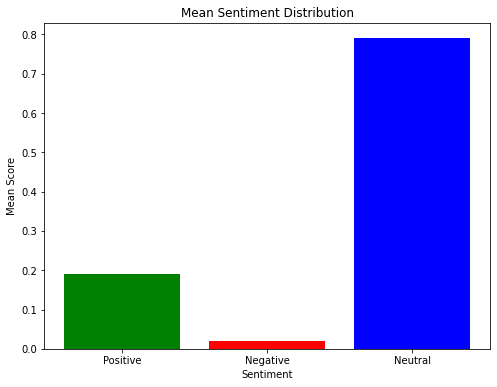

In [42]:
mean_positive_score = scores.apply(lambda x: x['Positive']).mean()
mean_negative_score = scores.apply(lambda x: x['Negative']).mean()
mean_neutral_score = scores.apply(lambda x: x['Neutral']).mean()

sentiments = ['Positive', 'Negative', 'Neutral']
scores = [mean_positive_score, mean_negative_score, mean_neutral_score]

plt.figure(figsize=(8, 6))
plt.bar(sentiments, scores, color=['green', 'red', 'blue'])
plt.title('Mean Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Mean Score')
plt.show()

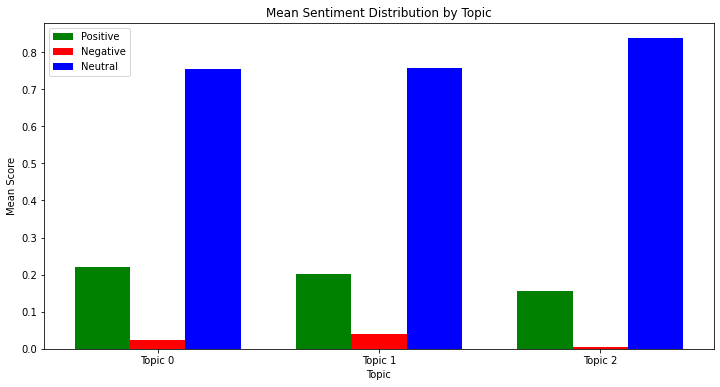

In [43]:
grouped_df = df.groupby('Dominant_Topic')

mean_positive_scores = []
mean_negative_scores = []
mean_neutral_scores = []
topic_names = []

for topic, group in grouped_df:
    mean_positive_score = group['Positive'].mean()
    mean_negative_score = group['Negative'].mean()
    mean_neutral_score = group['Neutral'].mean()
    
    mean_positive_scores.append(mean_positive_score)
    mean_negative_scores.append(mean_negative_score)
    mean_neutral_scores.append(mean_neutral_score)
    topic_names.append(f"Topic {topic}")

bar_width = 0.25
index = range(len(topic_names))

plt.figure(figsize=(12, 6))
plt.bar(index, mean_positive_scores, width=bar_width, label='Positive', color='green')
plt.bar([i + bar_width for i in index], mean_negative_scores, width=bar_width, label='Negative', color='red')
plt.bar([i + 2 * bar_width for i in index], mean_neutral_scores, width=bar_width, label='Neutral', color='blue')

plt.xlabel('Topic')
plt.ylabel('Mean Score')
plt.title('Mean Sentiment Distribution by Topic')
plt.xticks([i + bar_width for i in index], topic_names)
plt.legend()
plt.show()